## Multivariate Statistical Analysis

### Assignment 6 

**12112627 李乐平**



### Question 7.4

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("exec7.7data.xlsx")
df

C:\Users\Wandering Troubadour\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,周,阿莱德化学,杜邦,联合碳化物,埃克森,德士古
0,1,0.000000,0.000000,0.000000,0.039473,0.000000
1,2,0.027027,-0.044855,-0.003030,-0.014466,0.043478
2,3,0.122807,0.060773,0.088146,0.086238,0.078124
3,4,0.057031,0.029948,0.066808,0.013513,0.019512
4,5,0.063670,-0.003793,-0.039788,-0.018644,-0.024154
...,...,...,...,...,...,...
95,96,0.000000,-0.020080,-0.006579,0.029925,-0.004807
96,97,0.021429,0.049180,0.006622,-0.002421,0.028985
97,98,0.045454,0.046375,0.074561,0.014563,0.018779
98,99,0.050167,0.036380,0.004082,-0.011961,0.009216


In [8]:
corr = df.iloc[:, 1:].corr()
corr

,阿莱德化学,杜邦,联合碳化物,埃克森,德士古
阿莱德化学,1.000000,0.576924,0.508656,0.386721,0.462178
杜邦,0.576924,1.000000,0.598384,0.389519,0.321953
联合碳化物,0.508656,0.598384,1.000000,0.436101,0.425627
埃克森,0.386721,0.389519,0.436101,1.000000,0.523529
德士古,0.462178,0.321953,0.425627,0.523529,1.000000


In [16]:
eig_val, eig_vec = np.linalg.eig(corr)
sorted_indices = np.argsort(eig_val)[::-1]
eig_val = eig_val[sorted_indices]
eig_vec = eig_vec[:, sorted_indices]
eig_vec, eig_val

(array([[ 0.46354054,  0.24084986,  0.61335698, -0.38137266,  0.45328757],
        [ 0.45707636,  0.5090997 , -0.17789962, -0.21130679, -0.67498139],
        [ 0.46998043,  0.26057743, -0.33703554,  0.66409849,  0.39572471],
        [ 0.42167703, -0.52526472, -0.53901809, -0.47280364,  0.17944825],
        [ 0.42132914, -0.58224156,  0.4336029 ,  0.3812273 , -0.38746715]]),
 array([2.85648688, 0.8091185 , 0.54004398, 0.45134682, 0.34300382]))

In [27]:
for i in range(5):
    print(f"""λ{i + 1} = {eig_val[i]: .3f}, y{i + 1} = {
        ' + '.join([f"{eig_vec[k, i]: .3f}x{k + 1}" for k in range(5)])
    }""")

λ1 =  2.856, y1 =  0.464x1 +  0.457x2 +  0.470x3 +  0.422x4 +  0.421x5
λ2 =  0.809, y2 =  0.241x1 +  0.509x2 +  0.261x3 + -0.525x4 + -0.582x5
λ3 =  0.540, y3 =  0.613x1 + -0.178x2 + -0.337x3 + -0.539x4 +  0.434x5
λ4 =  0.451, y4 = -0.381x1 + -0.211x2 +  0.664x3 + -0.473x4 +  0.381x5
λ5 =  0.343, y5 =  0.453x1 + -0.675x2 +  0.396x3 +  0.179x4 + -0.387x5


In [23]:
con = [eig / sum(eig_val) for eig in eig_val]
acc = con.copy()
for i in range(1, 5):
    acc[i] += acc[i - 1]

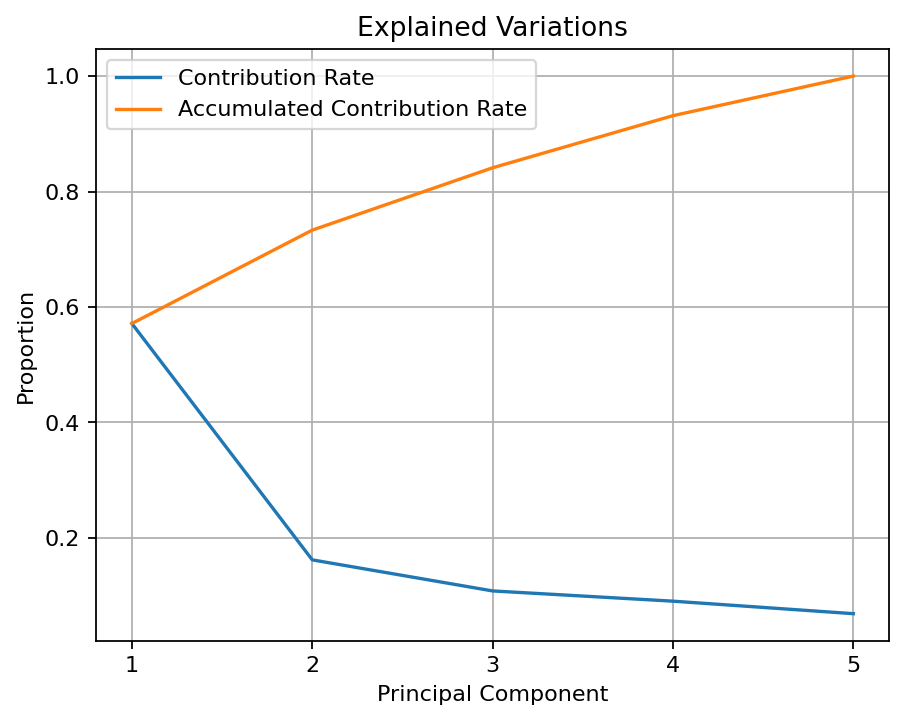

In [28]:
x_values = [1, 2, 3, 4, 5]
plt.figure(dpi = 160)
plt.plot(x_values, con, label = "Contribution Rate")
plt.plot(x_values, acc, label = "Accumulated Contribution Rate")

plt.title("Explained Variations")
plt.xlabel("Principal Component")
plt.ylabel('Proportion')
plt.xticks(x_values)
plt.legend()
plt.grid()

plt.show()